# __Ensembles__

### __Ensembles almost always work better__

### Bias & Variance

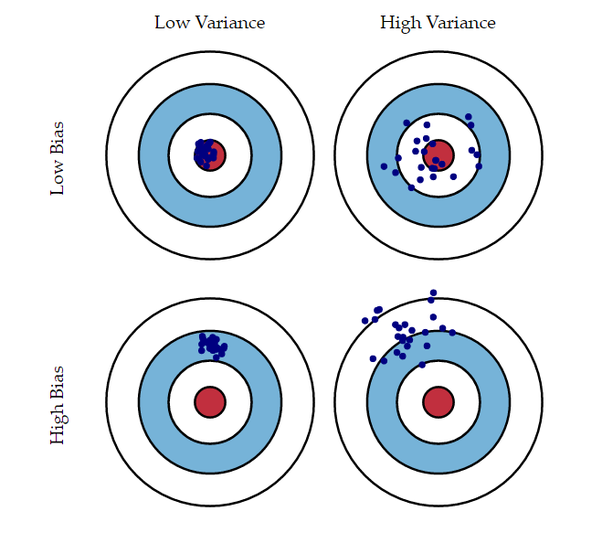

## 앙상블의목적: 다수의모델을학습하여오류의감소를추구
>**분산의감소에의한오류감소: 배깅(Bagging), 랜덤포레스트(Random Forest)** <br>
>편향의감소에의한오류감소: 부스팅(Boosting)

# __Bagging__

### Bagging: Bootstrapp Aggregating
> 앙상블의 각 멤버(모델)은 서로 다른 학습 데이터셋을 이용 <br>
> 개별 데이터셋을 붓스트랩(bootstrap)이라 부름

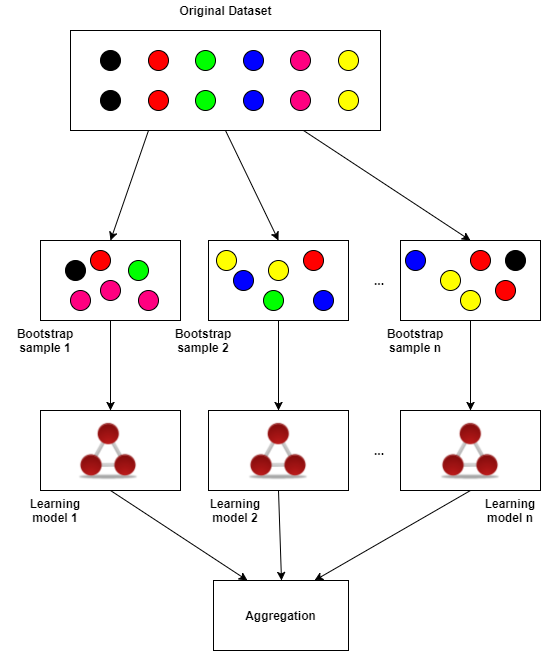

In [ ]:
# sklearn으로 bagging 만들기
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection # cross-validation score를 가져오기 위함
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier # bagging

from collections import Counter # count
from sklearn.metrics import f1_score

- 변수설명
    - preg: Number of times pregnant

    - plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    - pres: Diastolic blood pressure ($\text{mm Hg}$)

    - skin: Triceps skin fold thickness ($\text{mm}$)

    - test: 2-Hour serum insulin ($\text{mu U/ml}$)

    - mass: Body mass index ($\text{weight in kg}$/$(\text{height in m})^2$)

    - pedi: Diabetes pedigree function

    - age: Age ($\text{years}$)

    - class = (1: `tested positive for diabetes`, 0: `tested negative for diabetes`)

In [ ]:
filename = '../input/ysp-koreauniv-tutorial/pima-indians-diabetes.data.csv'
# 
df = pd.read_csv(filename, header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
df

In [ ]:
X = df.iloc[:,:-1]  # 마지막 column 제외 독립변수
Y = df.iloc[:,-1] # 마지막 column은 종속변수

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print('Number of train set:', len(x_train))
print('Number of test set:', len(x_test))

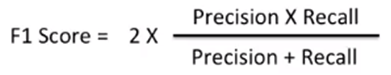

---

# __Package를 사용하여 random forest 코드 작성__

### Random forest
> Bagging 모델: subsample들의 **모든 변수**를 사용해 모델 구성 <br>
> Random forest 모델: subsample들의 **랜덤하게 선택된 변수**를 사용해 모델 구성

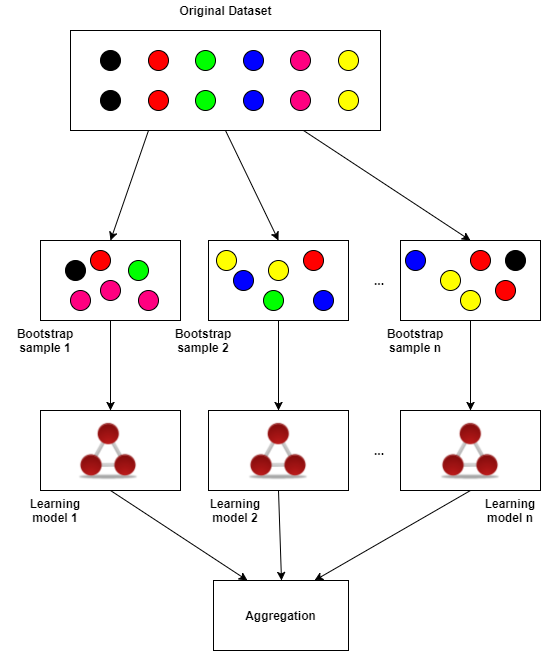

In [ ]:
# sklearn으로 random forest 만들기
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
rf_model = RandomForestClassifier(random_state = 0) # RF 모델 설정 (default 파라미터로)
rf_model.fit(x_train, y_train) # 학습
pred = rf_model.predict(x_test) # test 데이터에 대해 예측
print(classification_report(y_test, pred)) # 실데이터와 예측 데이터 비교
# roc_auc_score(y_test, pred)

In [ ]:
# hyperparameters
# 탐색하고자하는 파라미터를 dictionary 형식으로 저장
param_grid = {'n_estimators': [50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'oob_score': [True], # compute out of bag error
#               'n_jobs':[-1], 
#               'max_depth':[6,8,10,12],
              'min_samples_leaf':[8,12,18],
              'min_samples_split':[8,16,20]
              }

In [ ]:
# 1) 모델 선언 & 2) 여러 모델들을 ensemble: randomforest
rf_model = RandomForestClassifier()

# hyperparameter search
grid_search = GridSearchCV(rf_model, # 파라미터 탐색 대상 모델 
                           param_grid = param_grid, # 탐색 파라미터 입력
                           cv=5, # cross validation 횟수
                           scoring='f1', # f1 score를 기준으로 탐색
                           verbose=1)
grid_search.fit(x_train, y_train) # train data에 대해 탐색 시작

In [ ]:
grid_search.best_params_

- 최적의 파라미터를 찾은 후 모델 결정

In [ ]:
opt_model = grid_search.best_estimator_ # 최고 성능 파라미터의 모델을 불러온 후 저장
opt_model

In [ ]:
# 검증데이터에 대한 f1-score
opt_model.oob_score_

In [ ]:
# 4) 예측
test_pred = opt_model.predict(x_test)
test_pred

In [ ]:
# 테스트 데이터에 대한 f1-score
print(classification_report(y_test, test_pred)) # 실 데이터와 베스트 파라미터 모델 결과 비교
roc_auc_score(y_test, test_pred)

- 변수중요도
    - 모델이름.feature_importances_

In [ ]:
opt_model.feature_importances_

In [ ]:
df.columns[:-1]

In [ ]:
plt.bar(list(df.columns[:-1]), opt_model.feature_importances_) # x축을 컬럼 이름으로, y축을 변수중요도로 bar plot그리기
plt.xticks(rotation=90) # x축 90도 회전 (컬럼 이름)
plt.show()

---